<a href="https://colab.research.google.com/github/GOE84/Titanic-Survival-Data-Analysis-/blob/main/Titanic_Survival_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Data Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
df = pd.read_csv('Titanic-Dataset.csv')

In [14]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

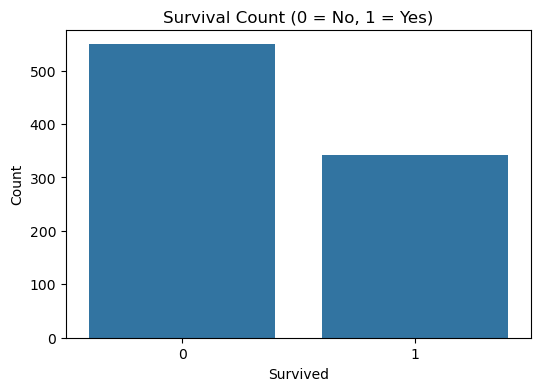

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [16]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

C:\Users\lolut\AppData\Local\Temp\ipykernel_2596\3252515374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


# Data Cleaning

In [17]:
df = pd.read_csv('Titanic-Dataset.csv')

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [19]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [21]:
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

# FEATURE ENGINEERING

In [22]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [25]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [26]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)

In [27]:
df.drop('Name', axis=1, inplace=True)

In [28]:
df.to_csv('titanic_ready_for_ml.csv', index=False)

In [29]:
print("ทำความสะอาดและสร้างฟีเจอร์ใหม่เรียบร้อย!")
print(df.head())


ทำความสะอาดและสร้างฟีเจอร์ใหม่เรียบร้อย!
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Has_Cabin  \
0         0       3    0  22.0      1      0   7.2500         0          0   
1         1       1    1  38.0      1      0  71.2833         1          1   
2         1       3    1  26.0      0      0   7.9250         0          0   
3         1       1    1  35.0      1      0  53.1000         0          1   
4         0       3    0  35.0      0      0   8.0500         0          0   

   Title  FamilySize  IsAlone  
0      1           2        0  
1      3           2        0  
2      2           1        1  
3      3           2        0  
4      1           1        1  


C:\Users\lolut\AppData\Local\Temp\ipykernel_2596\1182945102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')


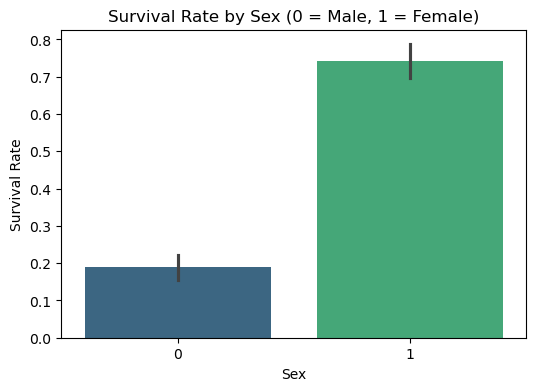

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Sex (0 = Male, 1 = Female)')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Hyperparameter Tuning and Ensemble Learning


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
df = pd.read_csv('titanic_ready_for_ml.csv')

In [33]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

** --- ขั้นตอนการสร้างและจูนโมเดล (The "Most Accurate" Strategy) ---**

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],      # จำนวนต้นไม้ในป่า
    'max_depth': [5, 10, 15, None],       # ความลึกสูงสุดของต้นไม้
    'min_samples_split': [2, 5, 10],      # จำนวนขั้นต่ำที่จะแตกกิ่ง
    'min_samples_leaf': [1, 2, 4],        # จำนวนขั้นต่ำที่ใบ
    'bootstrap': [True, False]            # การสุ่มตัวอย่าง
}

In [36]:
rf = RandomForestClassifier(random_state=42)

In [37]:
print("กำลังจูนโมเดล... (อาจใช้เวลาสักครู่)")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# --- ผลลัพธ์ ---

# ดึงโมเดลที่ดีที่สุดออกมา
best_model = grid_search.best_estimator_

# ทดสอบกับชุดข้อมูล Test
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ ความแม่นยำสูงสุดที่ทำได้ (Accuracy): {accuracy * 100:.2f}%")
print(f"ค่าพารามิเตอร์ที่ดีที่สุด: {grid_search.best_params_}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

กำลังจูนโมเดล... (อาจใช้เวลาสักครู่)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ ความแม่นยำสูงสุดที่ทำได้ (Accuracy): 82.68%
ค่าพารามิเตอร์ที่ดีที่สุด: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# XGBOOST

In [39]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.7 MB/s eta 0:00:26
    --------------------------------------- 1.3/72.0 MB 2.6 MB/s eta 0:00:27
   - -------------------------------------- 1.8/72.0 MB 2.7 MB/s eta 0:00:26
   - -------------------------------------- 2.1/72.0 MB 2.7 MB/s eta 0:00:26
   - -------------------------------------- 2.4/72.0 MB 2.1 MB/s eta 0:00:34
   - -------------------------------------- 2.6/72.0 MB 1.9 MB/s eta 0:00:37
   - -------------------------------------- 2.6/72.0 MB 1.9 MB/s eta 0:00:37
   - -------------------------------------- 2.6/72.0 MB 1.9 MB/s eta 0:00:37
   - -------------------------------------- 2.9/72.0 MB 1.5 MB/s eta 0:00:46
   - -------------------------------------- 2.9/72.0 MB 1.5 MB/s eta 0:00:46
   - -------------------------------------- 3.1/72.0 MB 1.3 MB/s eta 0:00:53
   - --------

In [40]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [41]:
df = pd.read_csv('titanic_ready_for_ml.csv')
X = df.drop('Survived', axis=1)
y = df['Survived']

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# learning_rate: อัตราการเรียนรู้ (ค่าน้อยๆ ยิ่งละเอียด แต่ช้า)
# n_estimators: จำนวนรอบการสร้างต้นไม้
# max_depth: ความลึกของต้นไม้ (ลึกมากไปจะ Overfit)
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1.0], # สุ่มใช้ feature บางส่วนเพื่อลด Overfit
    'subsample': [0.7, 1.0]         # สุ่มใช้ข้อมูลบางส่วน
}

In [43]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [44]:
print("กำลังจูน XGBoost... (รอนิดนึงนะครับ ของแรงใช้เวลาหน่อย)")
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# --- ผลลัพธ์ ---
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🚀 ความแม่นยำสูงสุดของ XGBoost: {accuracy * 100:.2f}%")
print(f"ค่าพารามิเตอร์เทพสุด: {grid_search.best_params_}")

กำลังจูน XGBoost... (รอนิดนึงนะครับ ของแรงใช้เวลาหน่อย)
Fitting 5 folds for each of 108 candidates, totalling 540 fits

🚀 ความแม่นยำสูงสุดของ XGBoost: 80.45%
ค่าพารามิเตอร์เทพสุด: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


C:\Users\lolut\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:58:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [49]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5,
                             use_label_encoder=False, eval_metric='logloss', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

print(f"🏆 ความแม่นยำแบบรวมร่าง (Voting Ensemble): {accuracy_score(y_test, y_pred_vote) * 100:.2f}%")

🏆 ความแม่นยำแบบรวมร่าง (Voting Ensemble): 82.68%


C:\Users\lolut\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
